### Import all the required libraries and the data from the excel sheet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import secrets
import math
data = pd.read_excel('titanic.xls')
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C


### *First of all fill all missing values in Age and Fare with mean values

> lets use a generic function which can perform replacing data effectively.

In [2]:
data['age'].fillna(data['age'].mean(), inplace=True)
data['fare'].fillna(data['fare'].mean(), inplace=True)
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,C
1305,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,C


#### Q1. Using the data for **age** and **fare** attribute given in Titanic dataset:
a. WAP to Plot histogram using singleton bucket.<br>
b. WAP to Plot an equal-width histogram of width 10.

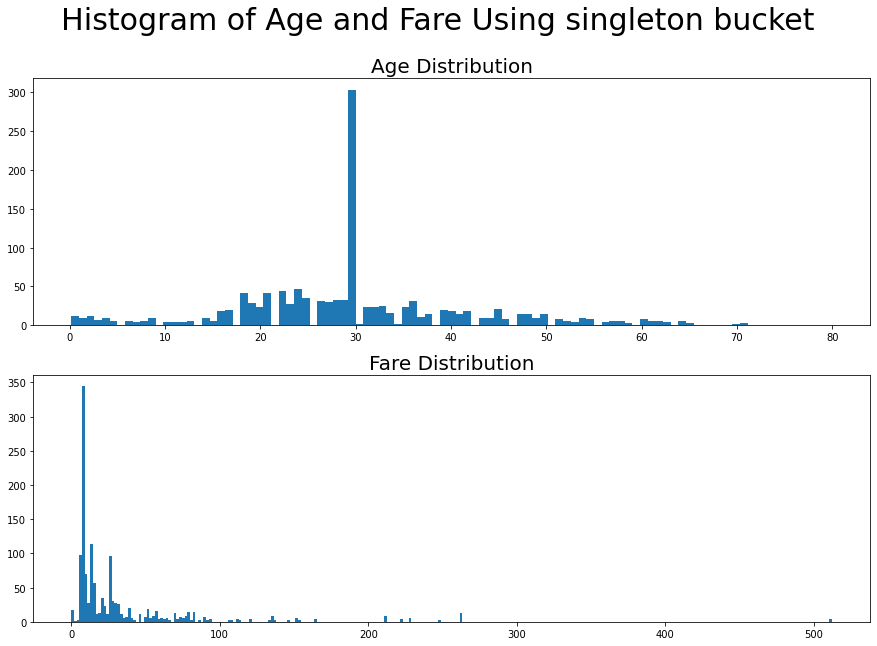

In [3]:
fig, axs = plt.subplots(2, figsize=(15,10))
fig.suptitle('Histogram of Age and Fare Using singleton bucket', fontsize=30)
axs[0].hist(data['age'], bins=data.age.nunique())
axs[0].set_title('Age Distribution', fontsize=20)
axs[1].hist(data['fare'], bins=data.fare.nunique())
axs[1].set_title('Fare Distribution', fontsize=20)
plt.show()

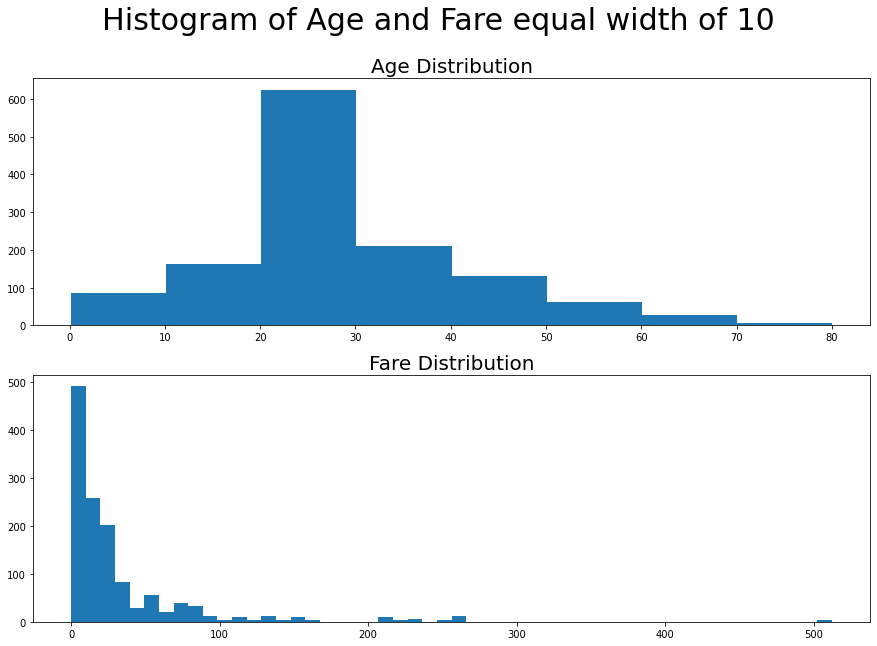

In [4]:
fig, axs = plt.subplots(2, figsize=(15,10))
fig.suptitle('Histogram of Age and Fare equal width of 10', fontsize=30)
axs[0].hist(data['age'], bins=math.ceil(data.age.max()/10))
axs[0].set_title('Age Distribution', fontsize=20)
axs[1].hist(data['fare'], bins=math.ceil(data.fare.max()/10))
axs[1].set_title('Fare Distribution', fontsize=20)
plt.show()

#### Q2. Using the data for **age** attribute given in Titanic dataset, WAP to perform sampling techniques (Select 30% samples with the following methods)
a. Simple Random Sampling with Replacement.<br>
b. Simple Random Sampling without Replacement.<br>
c. Stratified Sampling. (use three intervals as per the range of attribute).<br>


In [5]:
def randomSampleReplace(age):
    return [secrets.choice(age) for _ in range(int(len(age)*0.3))]

def randomSampleNoReplace(age):
    sample = set()
    while len(sample) < int(len(age)*0.3):
        sample.add(secrets.randbelow(len(age)))
    return [age[i] for i in sample]

def stratifiedSampling(age):
    interval = len(age)//3
    age.sort()
    sample = randomSampleNoReplace(age[:interval])
    sample.extend(randomSampleNoReplace(age[interval:2*interval]))
    sample.extend(randomSampleNoReplace(age[2*interval:]))
    return sample

replacement = randomSampleReplace(data['age'])
noReplacement = randomSampleNoReplace(data['age'])
stratified = stratifiedSampling(list(data['age']))

d. Calculate **mean** and **standard deviation** after sampling and compare it with **mean** and **standard deviation** of the original data.

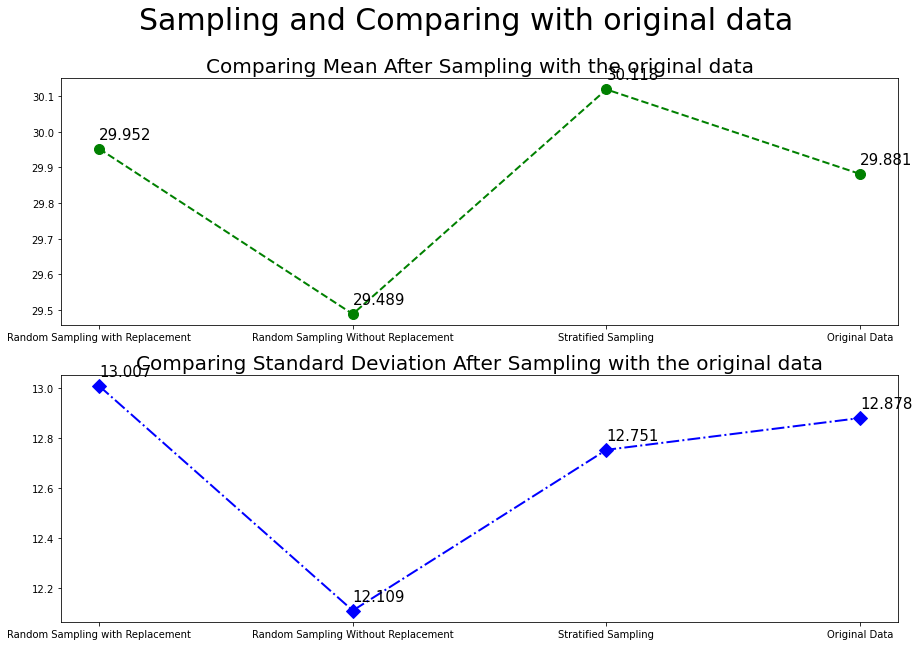

In [6]:
def meanStdDev(sample):
    mean = sum(sample) / len(sample)
    stdDev = math.sqrt(sum([(x - mean)**2 for x in sample]) / len(sample))
    return [mean, stdDev]

calculations = [meanStdDev(sample) for sample in [replacement, noReplacement, stratified, data.age]]
transposed = np.array(calculations).T.tolist()
labels = ['Random Sampling with Replacement', 'Random Sampling Without Replacement', 'Stratified Sampling', 'Original Data']

fig, axs = plt.subplots(2, figsize=(15,10))
fig.suptitle('Sampling and Comparing with original data', fontsize=30)

axs[0].plot(labels, transposed[0], 'go--', linewidth=2, markersize=10)
axs[0].set_title('Comparing Mean After Sampling with the original data', fontsize=20)

axs[1].plot(labels, transposed[1], 'bD-.', linewidth=2, markersize=10)
axs[1].set_title('Comparing Standard Deviation After Sampling with the original data', fontsize=20)

for x, y in zip(labels, calculations):
    axs[0].annotate(round(y[0],3), (x, y[0]), textcoords='offset points', xytext=(0,10),  size=15)
    axs[1].annotate(round(y[1],3), (x, y[1]), textcoords='offset points', xytext=(0,10),  size=15)
plt.show()

#### Q3. Using the data for **age** and **fare** attribute given in Titanic dataset, 
a. WAP for min-max normalization onto the range [0, 1].<br>
b. WAP for z-score normalization.<br>
c. WAP to perform decimal scaling.<br>
d. Calculate **mean** and **standard deviation** after all types of normalization and compare it with **mean** and **standard deviation** of the original data.

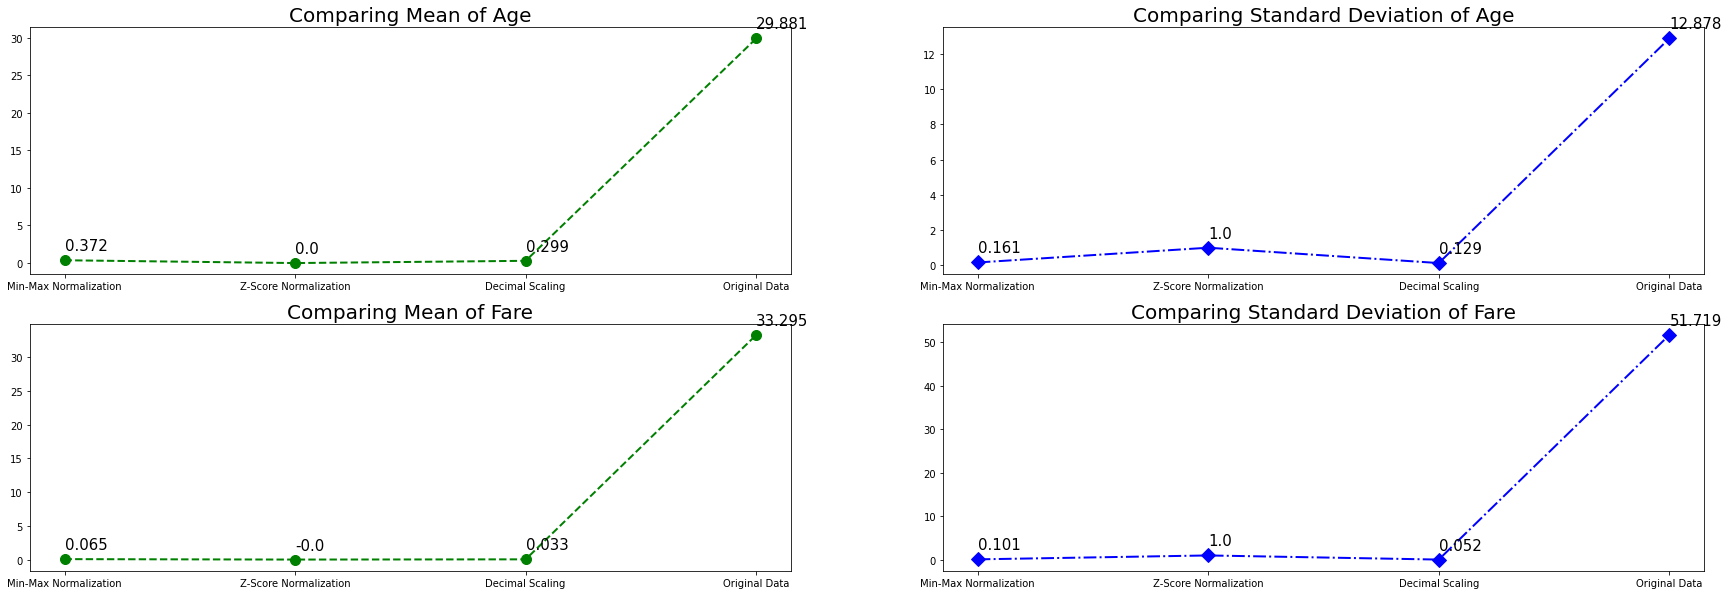

In [7]:
def min_max(arr):
    minn = min(arr)
    maxx = max(arr)
    return [(i - minn)/(maxx - minn)*(1-0)+0 for i in arr]

def z_score(arr):
    mean = sum(arr)/len(arr)
    stdDev = math.sqrt(sum([(x - mean)**2 for x in arr]) / len(arr))
    return [(x - mean)/stdDev for x in arr]

def decimal(arr):
    j =  math.floor(math.log10(max(arr))+1)
    return [x/(10**j) for x in arr]


def plot(fig, axs, arr, title):
    calculations = [meanStdDev(x) for x in [min_max(arr), z_score(arr), decimal(arr), arr]]
    transposed = np.array(calculations).T.tolist()
    labels = ['Min-Max Normalization', 'Z-Score Normalization', 'Decimal Scaling', 'Original Data']

    axs[0].plot(labels, transposed[0], 'go--', linewidth=2, markersize=10)
    axs[0].set_title('Comparing Mean of '+title, fontsize=20)

    axs[1].plot(labels, transposed[1], 'bD-.', linewidth=2, markersize=10)
    axs[1].set_title('Comparing Standard Deviation of '+title, fontsize=20)

    for x, y in zip(labels, calculations):
        axs[0].annotate(round(y[0],3), (x, y[0]), textcoords='offset points', xytext=(0,10),  size=15)
        axs[1].annotate(round(y[1],3), (x, y[1]), textcoords='offset points', xytext=(0,10),  size=15)


fig, axs = plt.subplots(2,2, figsize=(30,10))
plot(fig, axs[0], data.age, 'Age')
plot(fig, axs[1], data.fare, 'Fare')
plt.show()

Thank You